### Import libraries, regressors and classifier needed for the exploratory data analysis

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn import tree

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

#Importing the linear regression libraries and mean squared error libraries
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Importing the Video games dataset

In [124]:
game_data = pd.read_csv("Video_Games.csv")

#Create a fallback copy of the original dataset 
game_sales_data = game_data.copy()

In [125]:
#Veiw the data
game_sales_data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
#Get an overview of the dataset to see all possible faulty columns (e.g nans, wrong types and empty cells)
game_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [127]:
#Check for null values
game_sales_data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [128]:
#Check for duplicate entries
game_sales_data.duplicated().sum()

0

### Cleaning columns with null values

#### NAME COLUMN

In [129]:
#Replace the nan values along the name column with "Unknown"
game_sales_data['Name'].replace(np.nan, 'GEN',inplace = True)

In [130]:
game_sales_data['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

#### CLEANING YEAR OF REALEASE COLUMN

In [131]:
#Check for the unique values along the Year_of_Release column
game_sales_data['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [132]:
#Change all instances of nans along the Year_of_Release column to 0 
game_sales_data['Year_of_Release'].replace(np.nan,0, inplace= True)

In [133]:
#Convert the Year_of_Release column to int
game_sales_data['Year_of_Release'] =game_sales_data['Year_of_Release'].astype('int')

In [134]:
game_sales_data['Year_of_Release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,    0, 1995,
       1991, 1981, 1987, 1980, 1983, 2020, 2017])

#### CLEANING THE GENRE COLUMN

In [135]:
game_sales_data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [136]:
#Change all instances of nans along the Genre column to Unknown
game_sales_data['Genre'].replace(np.nan,"Unknown", inplace= True)

#### CLEANING THE PUBLISHER

In [137]:
game_sales_data['Publisher'].replace(np.nan,"Unknown", inplace= True)

#### CLEANING THE CRITIC SCORE, CRITIC COUNTS, USER SCORE, USER COUNTS

In [138]:
game_sales_data['Critic_Count'].unique()

array([ 51.,  nan,  73.,  65.,  41.,  80.,  64.,  63.,  45.,  33.,  50.,
        58.,  62.,  37.,  54.,  81.,  89.,  21., 100.,  39.,  56.,  66.,
        57.,  86.,  74.,  16.,  82.,  67.,  29.,  15.,  70.,  99.,  20.,
        87.,  23.,  24.,  10.,  27.,  42.,  91.,  53.,  75.,  46.,  84.,
        38.,  12.,  90.,  97.,  44., 105.,  77.,  68.,  28.,  94.,  96.,
        61.,  22.,  88.,  47.,  98.,  85.,  13.,   8.,  95.,  17.,  35.,
        19.,  48.,  14., 113.,  83.,  72.,  30.,  69.,  76.,  18.,  34.,
        40., 101.,   9.,  32.,  78.,  36.,  25.,  59.,  31.,  79.,  26.,
        49.,  60.,  11.,  43., 107.,   7.,  71.,  55.,  52.,  92.,   4.,
        93.,   5.,   6., 103., 102., 106.,   3., 104.])

In [139]:
#Change all instances of nans along the Critic and user column to 0
game_sales_data['Critic_Score'].replace(np.nan, 0,inplace = True)
game_sales_data['Critic_Count'].replace(np.nan, 0,inplace = True)
game_sales_data['User_Score'] = game_sales_data['User_Score'].replace('tbd', np.nan)
game_sales_data['User_Score'].replace(np.nan,0, inplace= True)

#Change all instances of nans along the User_Count column to the median of the column
game_sales_data['User_Count'].replace(np.nan,game_data['User_Count'].median(), inplace= True)

#Convert the User_Scores to float from string
game_sales_data['User_Score'] =game_sales_data['User_Score'].astype(float)

#Convert the Critic_Count to int
game_sales_data['Critic_Count'] =game_sales_data['Critic_Count'].astype(int)

#### CLEANING THE DEVELOPER COLUMN

In [140]:
game_sales_data['Developer'].replace(np.nan,"Unknown", inplace= True)

#### CLEANING THE RATING AND PLATFORM COLUMNS

In [141]:
game_sales_data[game_sales_data['Rating'].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.0,0,0.0,24.0,Unknown,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0,0,0.0,24.0,Unknown,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,0.0,0,0.0,24.0,Unknown,NaN
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,0.0,0,0.0,24.0,Unknown,NaN
10,Nintendogs,DS,2005,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,0.0,0,0.0,24.0,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,0.0,0,0.0,24.0,Unknown,NaN
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,0.0,0,0.0,24.0,Unknown,NaN
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,0.0,0,0.0,24.0,Unknown,NaN
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,0.0,0,0.0,24.0,Unknown,NaN


In [142]:
#Checking the unique values along the rating column
game_sales_data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [143]:
game_sales_data['Rating'].replace(np.nan,"Unknown", inplace= True)

In [144]:
#Get the first ten platforms in the dataset
Firt_10_platforms = game_sales_data['Platform'].value_counts().head(10).index.tolist()
game_sales_data.loc[~game_sales_data['Platform'].isin(Firt_10_platforms), 'Platform'] = 'plats'

game_sales_data['Platform'].value_counts()

plats    3467
PS2      2161
DS       2152
PS3      1331
Wii      1320
X360     1262
PSP      1209
PS       1197
PC        974
XB        824
GBA       822
Name: Platform, dtype: int64

In [145]:
game_sales_data.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

#### Determining Which of the variables in the video game dataset or a combination of them best predicts “global sales” of video games 

In [146]:
#Get a statistical overview of the dataset
game_sales_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16719.0,1974.204019,252.530614,0.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,16719.0,33.566003,35.817714,0.00,0.00,0.00,70.00,98.00
Critic_Count,16719.0,12.829595,18.679793,0.00,0.00,0.00,21.00,113.00
User_Score,16719.0,3.234589,3.688653,0.00,0.00,0.00,7.30,9.70
User_Count,16719.0,86.752856,384.376835,4.00,24.00,24.00,24.00,10665.00


<Figure size 720x480 with 0 Axes>

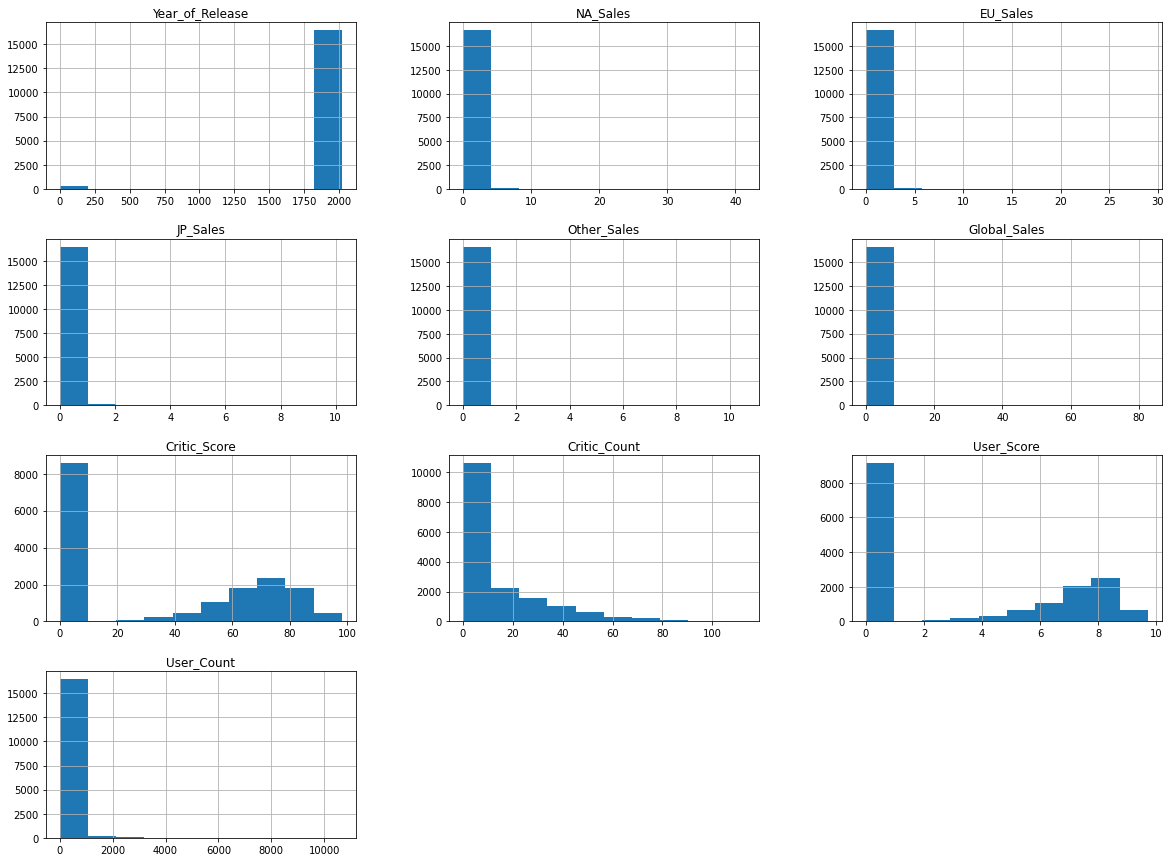

In [147]:
 # These charts display all the numerical datatypes 
plt.figure(dpi = 120)
game_sales_data.hist(figsize = (20, 15))
plt.show()

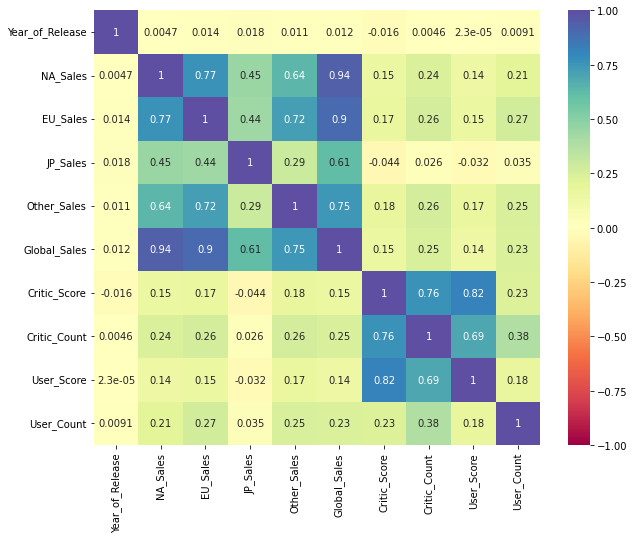

In [148]:
#Get the correlation between global sales and other variables in the dataset
game_corelation = game_sales_data.corr()
plt.figure(figsize= (10,8))
sns.heatmap(game_sales_data.corr(), annot = True,vmin = -1,vmax= 1,cmap = 'Spectral')

#Save the heatmap as png image file
plt.savefig('heatmap.png')

In [149]:
#Creating a dataframe containing only the numerical variables or data by removing the object data types
numeric_game_data = game_sales_data.select_dtypes(exclude = "object")
numeric_game_data

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322.0
1,1985,29.08,3.58,6.81,0.77,40.24,0.0,0,0.0,24.0
2,2008,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709.0
3,2009,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192.0
4,1996,11.27,8.89,10.22,1.00,31.37,0.0,0,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...
16714,2016,0.00,0.00,0.01,0.00,0.01,0.0,0,0.0,24.0
16715,2006,0.00,0.01,0.00,0.00,0.01,0.0,0,0.0,24.0
16716,2016,0.00,0.00,0.01,0.00,0.01,0.0,0,0.0,24.0
16717,2003,0.01,0.00,0.00,0.00,0.01,0.0,0,0.0,24.0


In [150]:
# Assign input and output variables from the numeric dataset
X = numeric_game_data.drop(['Global_Sales'], axis=1) 
y = numeric_game_data['Global_Sales']

In [151]:
# Split the numeric data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
# Applying StandardScaler() to the independent variables
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

In [153]:
#converting to pandas dataframe
X_train_standard = pd.DataFrame(X_train_standard, columns = X_train.columns)
X_test_standard = pd.DataFrame(X_test_standard, columns = X_test.columns)

#### Defining a function to run linear regression on all the variables

In [158]:
def Linear_regres(column_name):
    
    """
    This function takes in a column name as an argument and then performs a LinearRegression on the particular column    
        
    """
     
    X_train_standard[column_name].shape

# Reshaping the attribute/variable
    X_train_standard_Sales = X_train_standard[column_name].to_numpy().reshape(-1,1) 
    X_test_standard_Sales = X_test_standard[column_name].to_numpy().reshape(-1,1)

    global_sales = LinearRegression() 
    global_sales.fit(X_train_standard_Sales,y_train)
    
    
# # Print the scores and the mean score
# print("Cross-validation scores:", scores)
# print("Mean cross-validation score:", np.mean(scores))

# Print coefficients
    intercept = global_sales.intercept_
    coefficient = global_sales.coef_
    print('Intercept:', intercept)
    print('Coefficients:', coefficient)

    linear_model = 'Global sales = {:.2f} + {:.2f}*columns'.format(intercept, coefficient[0])
    print('Linear Regression Model:', linear_model)
    print('\n')
# Make predictions with the testing dataset 
    GSales_pred = global_sales.predict(X_test_standard_Sales)

# The mean absolute error
    mean_absolute = mean_absolute_error(y_test,GSales_pred)
# The mean squared error
    mean_squared = mean_squared_error(y_test,GSales_pred)
    print(f"Mean Absolute Error for {column_name} is: {mean_absolute:.2f}")
    print(f"Mean Squared Error for {column_name} is : {mean_squared:.2f}")
    print(f"Root Mean Squared Error for {column_name} is : {np.sqrt(mean_squared):.2f}")
    print(f"Coefficient of Determination for {column_name} is: {r2_score(y_test,GSales_pred):.2f}")


#### Checking to see How The Various Region Sales Predict Global Sales

##### NA_SALES

In [161]:
Linear_regres("NA_Sales")

Intercept: 0.5255543925233646
Coefficients: [1.29909089]
Linear Regression Model: Global sales = 0.53 + 1.30*columns


Mean Absolute Error for NA_Sales is: 0.20
Mean Squared Error for NA_Sales is : 0.29
Root Mean Squared Error for NA_Sales is : 0.54
Coefficient of Determination for NA_Sales is: 0.93


###### EU_SALES

In [35]:
Linear_regres("EU_Sales")

Intercept: 0.5255543925233646
Coefficients: [1.21447115]
Linear Regression Model: Global sales = 0.53 + 1.21*columns


Mean Absolute Error for EU_Sales is: 0.24
Mean Squared Error for EU_Sales is : 0.30
Root Mean Squared Error for EU_Sales is : 0.55
Coefficient of Determination for EU_Sales is: 0.93


##### JP_SALES

In [36]:
Linear_regres("JP_Sales")

Intercept: 0.5255543925233646
Coefficients: [0.89000933]
Linear Regression Model: Global sales = 0.53 + 0.89*columns


Mean Absolute Error for JP_Sales is: 0.52
Mean Squared Error for JP_Sales is : 2.82
Root Mean Squared Error for JP_Sales is : 1.68
Coefficient of Determination for JP_Sales is: 0.32


##### Other_Sales

In [37]:
Linear_regres("Other_Sales")

Intercept: 0.5255543925233646
Coefficients: [0.94908078]
Linear Regression Model: Global sales = 0.53 + 0.95*columns


Mean Absolute Error for Other_Sales is: 0.35
Mean Squared Error for Other_Sales is : 1.17
Root Mean Squared Error for Other_Sales is : 1.08
Coefficient of Determination for Other_Sales is: 0.72


#### Checking to see How The Various Region Sales Predict Global Sales Using Multiple linear regression

In [38]:
#Train the model using the training sets
reg = LinearRegression().fit(X_train_standard, y_train)
reg

# Print coefficients
print('Intercept:', reg.intercept_)
print('Coefficients:', reg.coef_)

y_pred = reg.predict(X_test_standard)


 #Print linear model
coefficients = reg.coef_
intercept = reg.intercept_
linear_model = 'Global_Sales = {:.2f} + {:.2f}*Year_of_Release + {:.2f}*NA_Sales + {:.2f}*EU_Sales + {:.2f}*JP_Sales + {:.2f}*Other_Sales + {:.2f}*Critic_Score + {:.2f}*Critic_Count + {:.2f}*User_Score + {:.2f}*User_Count'.format(intercept,coefficients[0],coefficients[1],coefficients[2],coefficients[3],coefficients[4],coefficients[5],coefficients[6],coefficients[7],coefficients[8])
print('\n')
print('Multiple Linear Regression Model:', linear_model)



# Calculate evaluation metrics for multiple linear regression
# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
# The mean squared error
mse = mean_squared_error(y_test, y_pred)
# The root mean squared error
rmse = np.sqrt(mse)
#rmse2 = mean_squared_error(y_test, y_pred, squared=False)
# The mean absolute error
mae = mean_absolute_error(y_test, y_pred)


# Print evaluation metrics for multiple linear regression
print('\n')
print('coefficient of determination (R-squared) is:', r2)
print('Mean Squared Error is:', mse)
print('Root Mean Squared Error is:', rmse)
#print('Root Mean Squared Error 2:', rmse)
print('Mean Absolute Error is:', mae)


Intercept: 0.5255543925233646
Coefficients: [ 4.05305007e-06  7.54512624e-01  4.41858390e-01  3.08071436e-01
  1.80868353e-01  2.75569701e-04 -1.35771489e-04 -1.91511865e-04
 -1.08959330e-04]


Multiple Linear Regression Model: Global_Sales = 0.53 + 0.00*Year_of_Release + 0.75*NA_Sales + 0.44*EU_Sales + 0.31*JP_Sales + 0.18*Other_Sales + 0.00*Critic_Score + -0.00*Critic_Count + -0.00*User_Score + -0.00*User_Count


coefficient of determination (R-squared) is: 0.9999932660626304
Mean Squared Error is: 2.7797390970018772e-05
Root Mean Squared Error is: 0.005272323109410004
Mean Absolute Error is: 0.0029889605055546816


#### Checking Different Regressors

In [39]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_standard, y_train)
y_pred_rf = rf.predict(X_test_standard)

print("Random Forest Regression coef of det R2:", r2_score(y_test, y_pred_rf))
print("Random Forest Regression MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest Regression RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest Regression MAE:", mean_absolute_error(y_test, y_pred_rf))

Random Forest Regression coef of det R2: 0.8189129888253113
Random Forest Regression MSE: 0.7475190476104231
Random Forest Regression RMSE: 0.8645918387368823
Random Forest Regression MAE: 0.042935194530395376


In [40]:
# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_standard, y_train)
y_pred_gb = gb.predict(X_test_standard)

print("Gradient Boosting Regression coef of det R2:", r2_score(y_test, y_pred_gb))
print("Gradient Boosting Regression MSE:", mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting Regression MAE:", mean_absolute_error(y_test, y_pred_gb))
print("Gradient Boosting Regression RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))

Gradient Boosting Regression coef of det R2: 0.8519979303086304
Gradient Boosting Regression MSE: 0.6109458953593238
Gradient Boosting Regression MAE: 0.04562228152569117
Gradient Boosting Regression RMSE: 0.7816302804774926


In [41]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_standard, y_train)
y_pred_lasso = lasso.predict(X_test_standard)


print("Lasso Regression coef of det R2:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression RMSE:", mean_squared_error(y_test, y_pred_lasso, squared=False))
print("Lasso Regression MAE:", mean_absolute_error(y_test, y_pred_lasso))

Lasso Regression coef of det R2: 0.9933628200511764
Lasso Regression MSE: 0.027397980683316225
Lasso Regression RMSE: 0.1655233538909728
Lasso Regression MAE: 0.0541855443542004


In [42]:
# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train_standard, y_train)
y_pred_svr = svr.predict(X_test_standard)


print("Support Vector Regression coef of det R2:", r2_score(y_test, y_pred_svr))
print("Support Vector Regression MSE:", mean_squared_error(y_test, y_pred_svr))
print("Support Vector Regression RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))
print("Support Vector Regression MAE:", mean_absolute_error(y_test, y_pred_svr))

Support Vector Regression coef of det R2: 0.9983559899106306
Support Vector Regression MSE: 0.006786399799165278
Support Vector Regression RMSE: 0.08237960790854298
Support Vector Regression MAE: 0.08174203756639316


In [43]:
# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train_standard, y_train)
y_pred_kn = kn.predict(X_test_standard)


print("K Neighbors Regression coef of det R2:", r2_score(y_test, y_pred_kn))
print("K Neighbors Regression MSE:", mean_squared_error(y_test, y_pred_kn))
print("K Neighbors Regression RMSE:", mean_squared_error(y_test, y_pred_kn, squared=False))
print("K Neighbors Regression MAE:", mean_absolute_error(y_test, y_pred_kn))

K Neighbors Regression coef of det R2: 0.7761093053313088
K Neighbors Regression MSE: 0.9242107303108935
K Neighbors Regression RMSE: 0.9613587937450271
K Neighbors Regression MAE: 0.0697432230417207


### Checking User and Critic on EU, NA and Japan

In [44]:
X_train

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count
9162,2008,0.13,0.00,0.00,0.01,0.0,0,0.0,24.0
8300,2013,0.00,0.08,0.08,0.01,0.0,0,0.0,24.0
6518,2007,0.00,0.00,0.26,0.00,0.0,0,0.0,24.0
3307,2011,0.27,0.18,0.09,0.07,58.0,26,5.4,77.0
12933,2015,0.05,0.00,0.00,0.01,0.0,0,0.0,24.0
...,...,...,...,...,...,...,...,...,...
11284,2009,0.08,0.00,0.00,0.01,0.0,0,0.0,24.0
11964,2015,0.03,0.00,0.03,0.01,78.0,33,8.1,63.0
5390,2008,0.25,0.05,0.00,0.04,54.0,4,6.7,13.0
860,2010,0.79,0.88,0.00,0.32,80.0,46,7.6,82.0


In [45]:
#Drop'Global_Sales','Year_of_Release','Other_Sales' columns
heat= numeric_game_data.drop(['Global_Sales','Year_of_Release','Other_Sales'], axis=1) 

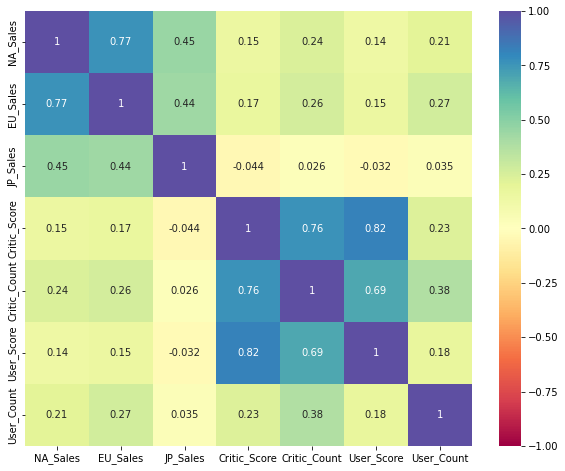

In [46]:
critic_cor = heat.corr()
plt.figure(figsize= (10,8))
sns.heatmap(heat.corr(), annot = True,vmin = -1,vmax= 1,cmap = 'Spectral')


#Save the heatmap as png image file
plt.savefig('Critic_user_heatmap.png')

#### Using multiple linear regressor for checking User and Critic on EU, NA and Japan

In [162]:
X_NA = numeric_game_data.drop(['Global_Sales','Year_of_Release','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1) 

#Create a list containing NA_Sales','EU_Sales','JP_Sales  to be used as target variables
target_var=['NA_Sales','EU_Sales','JP_Sales']

for target in target_var:    
    y_NA = numeric_game_data[target]

# Split data into training and testing sets
    X_NA_train, X_NA_test, y_NA_train, y_NA_test = train_test_split(X_NA, y_NA, test_size=0.2, random_state=42)


# Fitting the independent variables to the standard scaler 
    scaler = StandardScaler()
    scaler.fit(X_NA_train) 
    X_NA_train_standard = scaler.transform(X_NA_train)
    X_NA_test_standard = scaler.transform(X_NA_test)


 #Train the model using the training sets
    reg = LinearRegression().fit(X_NA_train_standard, y_NA_train)
    reg

# Print coefficients
    print(f"{target}:{'Intercept:', reg.intercept_}")
    print(f"{'Coefficients:', reg.coef_}")


    y_NA_pred = reg.predict(X_NA_test_standard)
    len(y_NA_pred)



 #Print linear model
    coefficients = reg.coef_
    intercept = reg.intercept_
    linear_model = 'target = {:.2f} + {:.2f}*Critic_Score + {:.2f}*Critic_Count + {:.2f}*User_Score + {:.2f}*User_Count'.format(intercept,coefficients[0],coefficients[1],coefficients[2],coefficients[3])
#     print('\n')
    print(f'Multiple Linear Regression Model for {target} is: {linear_model}')


# Calculate evaluation metrics
# The coefficient of determination: 1 is perfect prediction
    r2 = r2_score(y_NA_test, y_NA_pred)
# The mean squared error
    mse = mean_squared_error(y_NA_test, y_NA_pred)
# The root mean squared error
    rmse = np.sqrt(mse)
#rmse2 = mean_squared_error(y_test, y_pred, squared=False)
# The mean absolute error
    mae = mean_absolute_error(y_NA_test, y_NA_pred)

    
    # Print evaluation metrics
    print('\n')
    print('coefficient of determination (R-squared) is:', r2)
    print('Mean Squared Error is:', mse)
    print('Root Mean Squared Error is:', rmse)
    print('Mean Absolute Error is:', mae)
    
    print('\n')

NA_Sales:('Intercept:', 0.26022803738317757)
('Coefficients:', array([-0.03007865,  0.15840579, -0.00069573,  0.12326448]))
Multiple Linear Regression Model for NA_Sales is: target = 0.26 + -0.03*Critic_Score + 0.16*Critic_Count + -0.00*User_Score + 0.12*User_Count


coefficient of determination (R-squared) is: 0.05110613712381007
Mean Squared Error is: 0.978619545254719
Root Mean Squared Error is: 0.9892520130152472
Mean Absolute Error is: 0.2917038331972273


EU_Sales:('Intercept:', 0.1421128971962617)
('Coefficients:', array([-0.01022944,  0.08968177, -0.00118698,  0.11036703]))
Multiple Linear Regression Model for EU_Sales is: target = 0.14 + -0.01*Critic_Score + 0.09*Critic_Count + -0.00*User_Score + 0.11*User_Count


coefficient of determination (R-squared) is: 0.053350717954970595
Mean Squared Error is: 0.45938405707466673
Root Mean Squared Error is: 0.677778767058003
Mean Absolute Error is: 0.17496030569357898


JP_Sales:('Intercept:', 0.07617644859813083)
('Coefficients:', arr

### Using All The Relevant Categorical Variables as Targets

In [48]:
#Importing all necessary classifiers libraries

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler 

In [49]:
#Select only the Categorical columns from the dataset
categorical_data =  game_sales_data.select_dtypes(include = "object")
categorical_data

,Name,Platform,Genre,Publisher,Developer,Rating
0,Wii Sports,Wii,Sports,Nintendo,Nintendo,E
1,Super Mario Bros.,plats,Platform,Nintendo,Unknown,Unknown
2,Mario Kart Wii,Wii,Racing,Nintendo,Nintendo,E
3,Wii Sports Resort,Wii,Sports,Nintendo,Nintendo,E
4,Pokemon Red/Pokemon Blue,plats,Role-Playing,Nintendo,Unknown,Unknown
...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,Action,Tecmo Koei,Unknown,Unknown
16715,LMA Manager 2007,X360,Sports,Codemasters,Unknown,Unknown
16716,Haitaka no Psychedelica,plats,Adventure,Idea Factory,Unknown,Unknown
16717,Spirits & Spells,GBA,Platform,Wanadoo,Unknown,Unknown


In [50]:
# fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) 
# a = sns.countplot(x = 'Rating', data = game_sales_data, ax=ax_position[0])
# a = game_sales_data['Rating'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) 

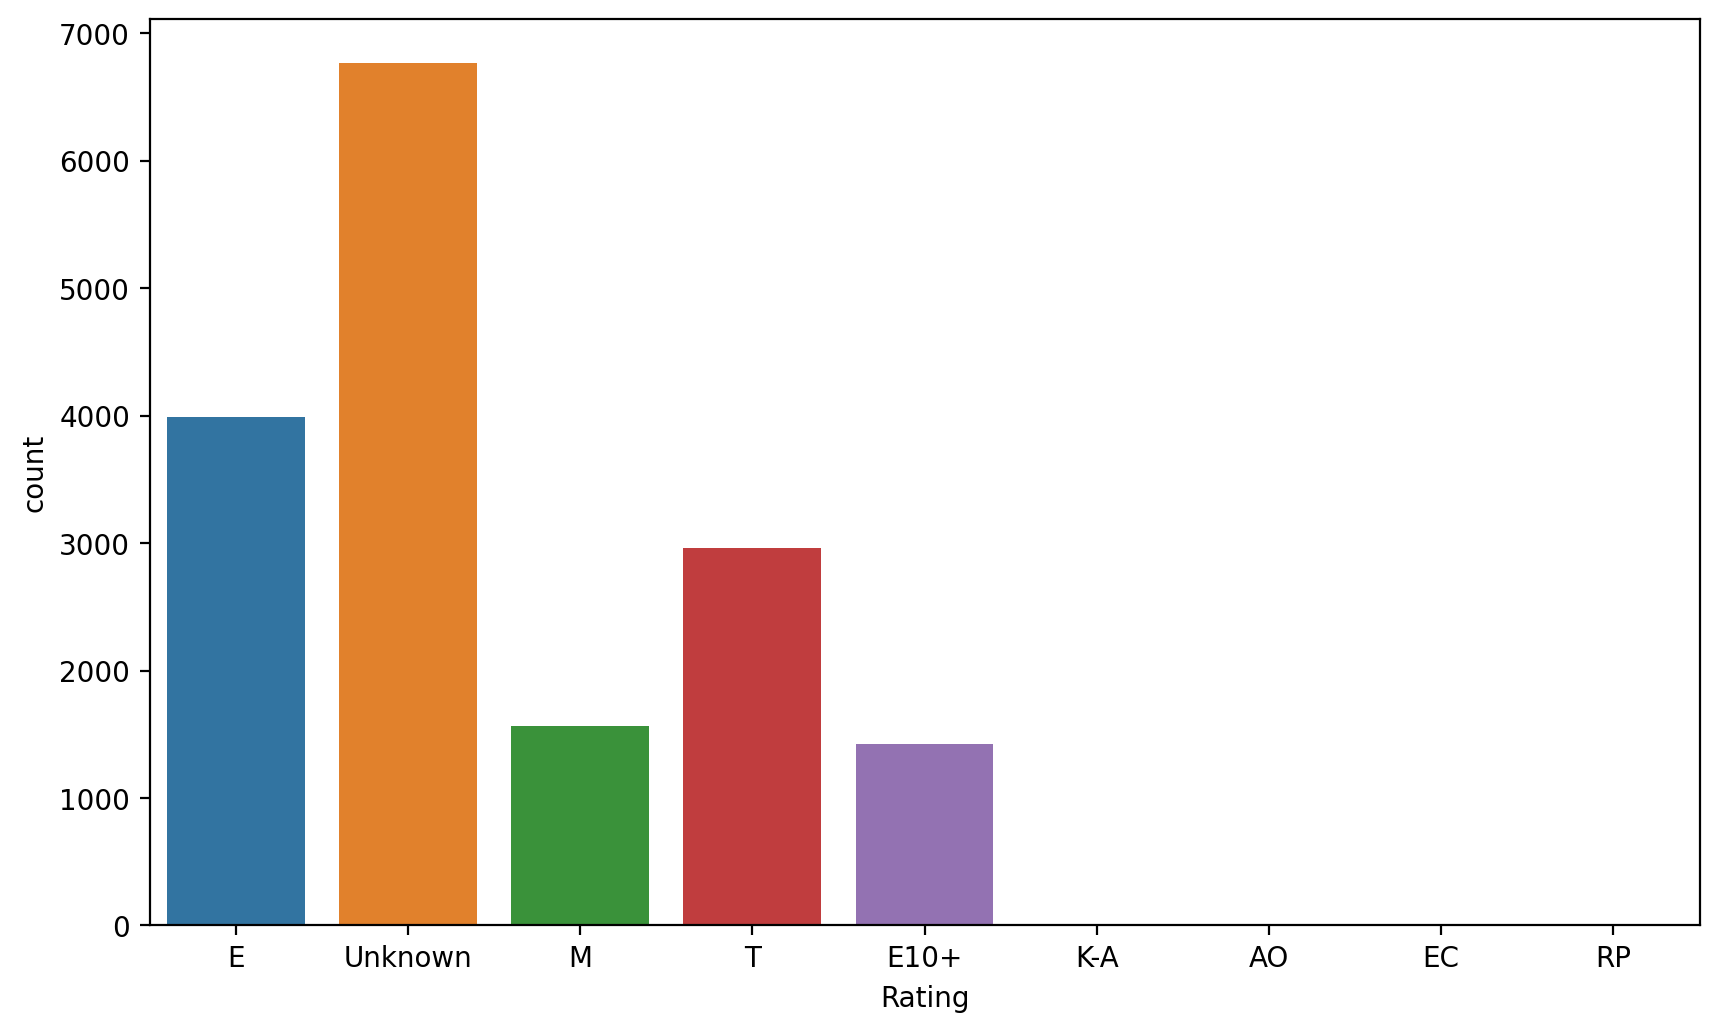

In [51]:
#Checking to see the distribution of the unique values in the rating column
fig, ax_position=plt.subplots(1,figsize=(10,6),dpi=200) 
Rating = sns.countplot(x = 'Rating', data = game_sales_data)
 
    
#Save the countplot as png image file
plt.savefig('Rating.png')

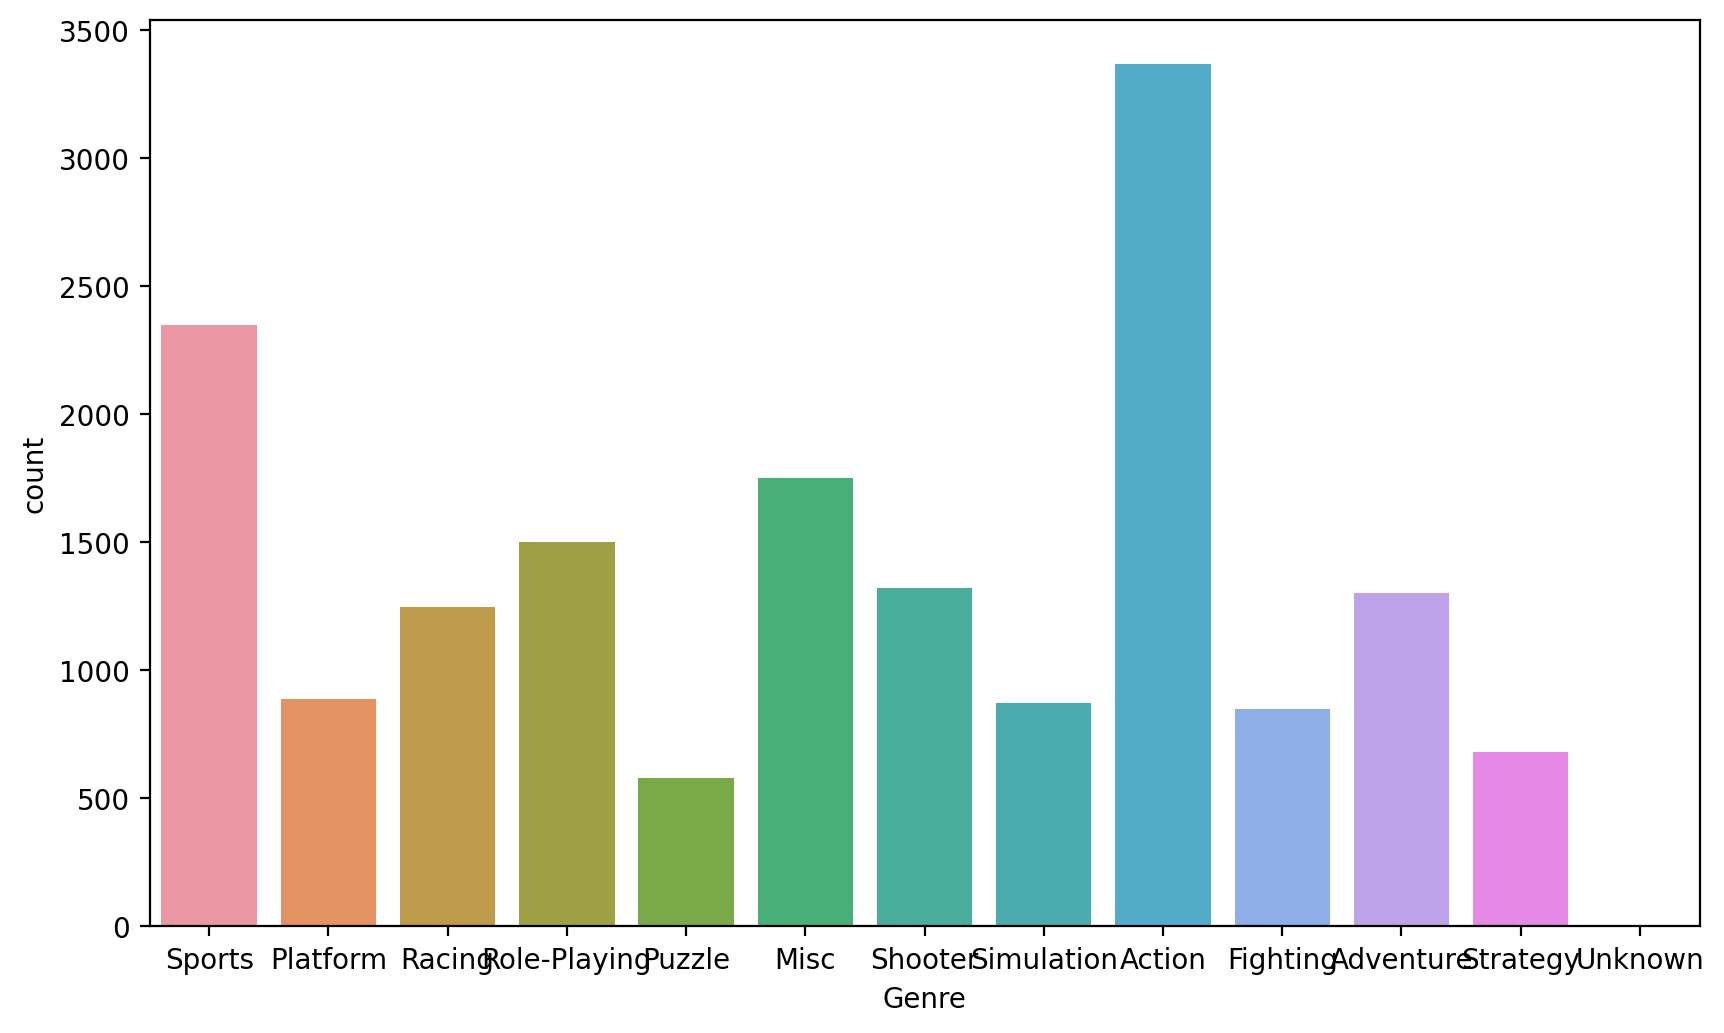

In [52]:
ig, ax_position=plt.subplots(1, figsize=(10,6),dpi=200) 
Genre = sns.countplot(x = 'Genre', data = game_sales_data) 

#Save the countplot as png image file
plt.savefig('Genre.png')

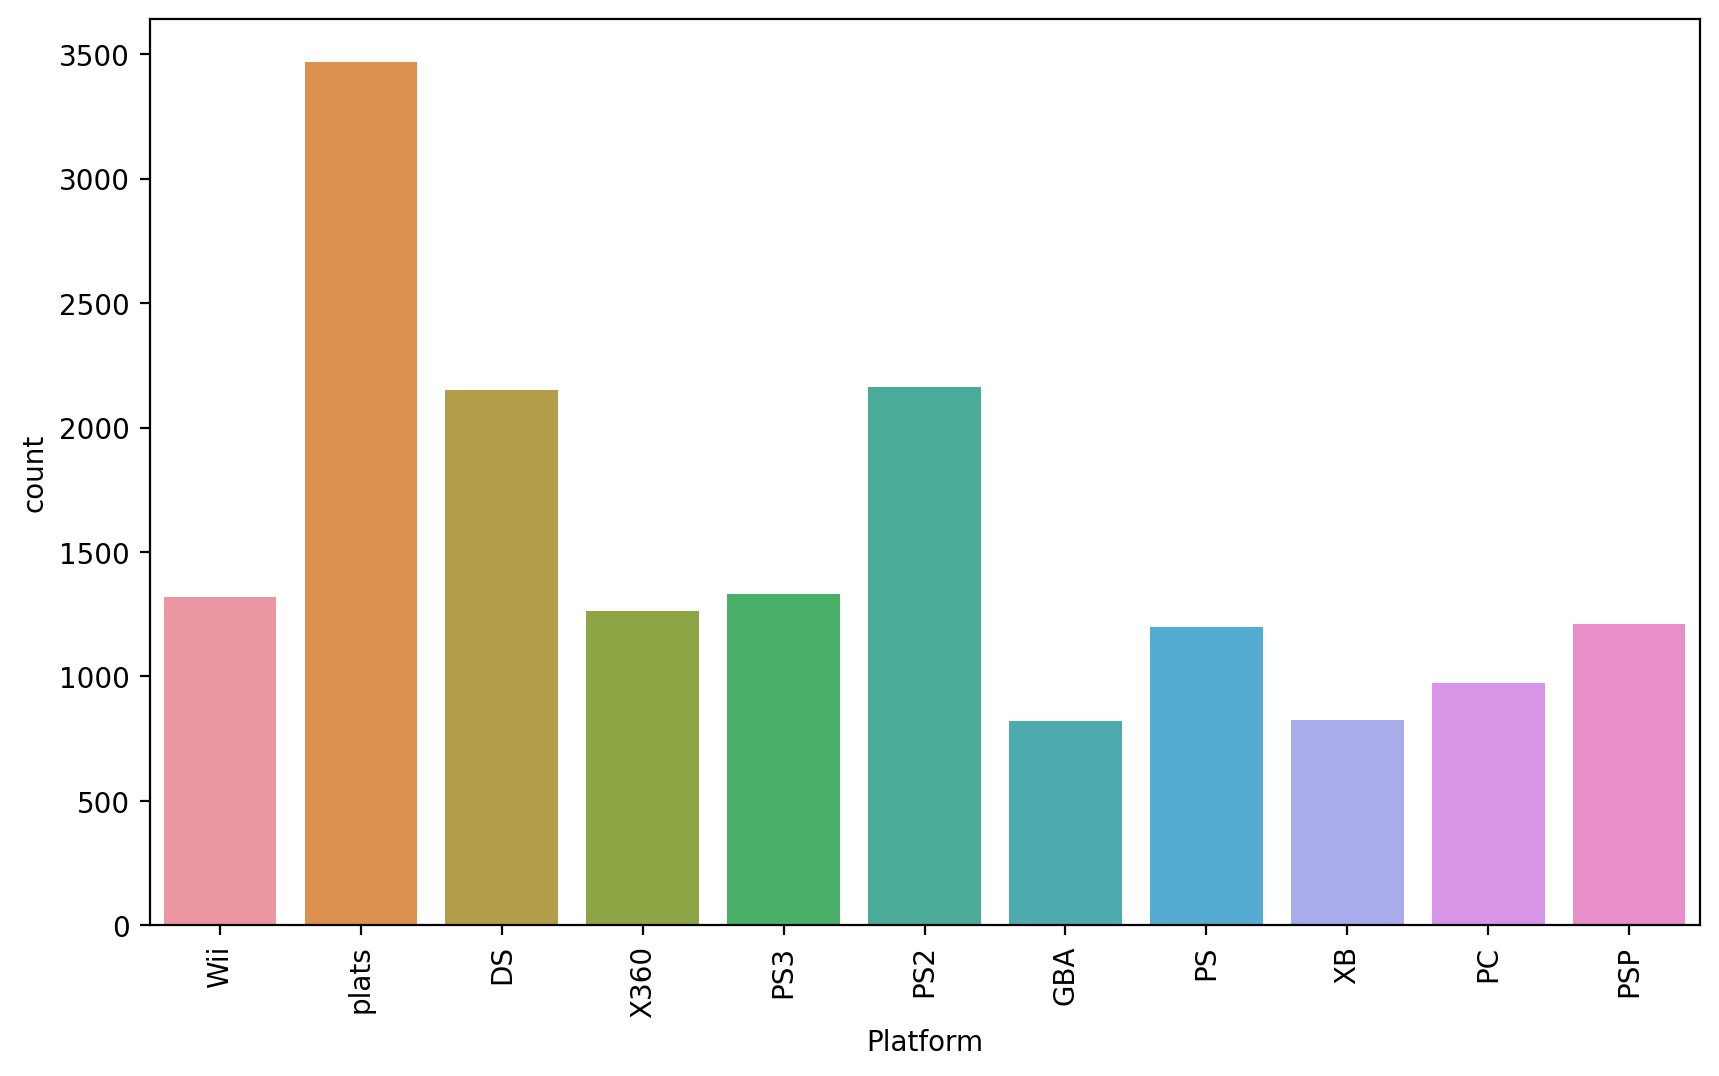

In [53]:
ig, ax_position=plt.subplots(1,figsize=(10,6),dpi=200)
Platform = sns.countplot(x = 'Platform', data = game_sales_data)
plt.xticks(rotation=90)

#Save the plot as png image file
plt.savefig('Platform.png')

In [56]:
#Create a new dataframe containing only the categorical columns
categorical_targets = categorical_data[['Genre', 'Rating','Platform']]
categorical_targets

,Genre,Rating,Platform
0,Sports,E,Wii
1,Platform,Unknown,plats
2,Racing,E,Wii
3,Sports,E,Wii
4,Role-Playing,Unknown,plats
...,...,...,...
16714,Action,Unknown,PS3
16715,Sports,Unknown,X360
16716,Adventure,Unknown,plats
16717,Platform,Unknown,GBA


In [57]:
#Concatinate the numerical dataset with our target categorical variables
categorical_targets = categorical_targets.reset_index(drop=True)
numeric_game_data = numeric_game_data.reset_index(drop=True)
new_game_data = pd.concat([categorical_targets, numeric_game_data], axis=1)

In [58]:
new_game_data

,Genre,Rating,Platform,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Sports,E,Wii,2006,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322.0
1,Platform,Unknown,plats,1985,29.08,3.58,6.81,0.77,40.24,0.0,0,0.0,24.0
2,Racing,E,Wii,2008,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709.0
3,Sports,E,Wii,2009,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192.0
4,Role-Playing,Unknown,plats,1996,11.27,8.89,10.22,1.00,31.37,0.0,0,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Action,Unknown,PS3,2016,0.00,0.00,0.01,0.00,0.01,0.0,0,0.0,24.0
16715,Sports,Unknown,X360,2006,0.00,0.01,0.00,0.00,0.01,0.0,0,0.0,24.0
16716,Adventure,Unknown,plats,2016,0.00,0.00,0.01,0.00,0.01,0.0,0,0.0,24.0
16717,Platform,Unknown,GBA,2003,0.01,0.00,0.00,0.00,0.01,0.0,0,0.0,24.0


Using Rating

In [59]:
# #Assign dependent and independent variables
# X = new_game_data.drop(['Rating','Genre','Platform'],  axis = 1) 
# y = new_game_data['Rating']

In [60]:
#Import the modling and classifier libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [187]:
def classify_dataset(target_variable):
    """
    Create a function to implement Classifier on the various target variables. This 
    function takes the column name as an argument.
    
    """
    #Assign dependent and independent variables
    X = new_game_data.drop(['Rating','Genre','Platform'],  axis = 1) 
    y = new_game_data[target_variable]
    
    # Define the classifier
    DTC = DecisionTreeClassifier()

    # Define cross-validation strategy
    cross_val = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # Perform cross-validation on the dependent and target variables
    scores = cross_val_score(DTC, X, y, cv=cross_val)

    # Print mean and standard deviation of scores
    print('\n')
    print(f'The Relevant Scores for {target_variable}')
    print('Cross-validation scores: ', scores)
    print('Mean score: ', scores.mean())
    print('Standard deviation: ', scores.std())

    # Fitting the classifier on the input and output data
    DTC.fit(X, y)

    # Make predictions on testing data
    y_pred = DTC.predict(X)

    # Print classification report
    print('\n')
    print(f'Classification Report for {target_variable}', ':')
    print(classification_report(y, y_pred))

    # Print confusion matrix
    print('\n')
    print(f'Confusion Matrix for {target_variable}', ':')
    print(confusion_matrix(y, y_pred))
    print('\n')  

    plt.figure(dpi=200, figsize=(12,15))
    ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=np.unique(y))
    plt.show() 


#### Generalization/Classification using Ratings



The Relevant Scores for Rating
Cross-validation scores:  [0.61600574 0.60882828 0.60864884]
Mean score:  0.611160954602548
Standard deviation:  0.0034265651264794392


Classification Report for Rating :
              precision    recall  f1-score   support

          AO       1.00      1.00      1.00         1
           E       0.93      0.98      0.95      3991
        E10+       0.98      0.94      0.96      1420
          EC       1.00      0.62      0.77         8
         K-A       1.00      1.00      1.00         3
           M       1.00      0.99      1.00      1563
          RP       1.00      1.00      1.00         3
           T       0.99      0.97      0.98      2961
     Unknown       0.98      0.97      0.97      6769

    accuracy                           0.97     16719
   macro avg       0.99      0.94      0.96     16719
weighted avg       0.97      0.97      0.97     16719



Confusion Matrix for Rating :
[[   1    0    0    0    0    0    0    0    0]
 [   0 390

<Figure size 3000x3000 with 0 Axes>

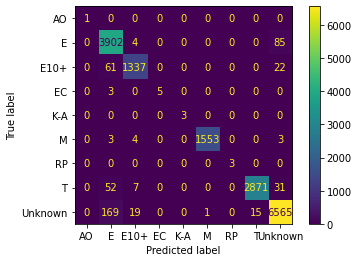

In [99]:
classify_dataset('Rating')

#### Generalization/Classification using Genre



The Relevant Scores for Genre
Cross-validation scores:  [0.22734613 0.22644895 0.22052754]
Mean score:  0.22477420898379089
Standard deviation:  0.0030251016487593233


Classification Report for Genre :
              precision    recall  f1-score   support

      Action       0.82      0.94      0.88      3370
   Adventure       0.59      0.83      0.69      1303
    Fighting       0.86      0.84      0.85       849
        Misc       0.76      0.80      0.78      1750
    Platform       0.95      0.90      0.93       888
      Puzzle       0.83      0.74      0.78       580
      Racing       0.94      0.88      0.91      1249
Role-Playing       0.90      0.78      0.84      1500
     Shooter       0.98      0.90      0.94      1323
  Simulation       0.91      0.73      0.81       874
      Sports       0.95      0.83      0.89      2348
    Strategy       0.95      0.73      0.83       683
     Unknown       1.00      1.00      1.00         2

    accuracy                         

<Figure size 2400x3000 with 0 Axes>

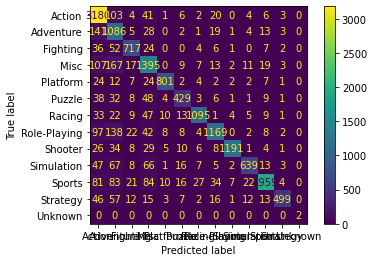

In [97]:
classify_dataset('Genre')

#### Generalization/Classification using Platforms



The Relevant Scores for Platform
Cross-validation scores:  [0.59339673 0.59501166 0.57706801]
Mean score:  0.5884921346970512
Standard deviation:  0.00810493793951241


Classification Report for Platform :
              precision    recall  f1-score   support

          DS       0.76      0.90      0.82      2152
         GBA       0.93      0.97      0.95       822
          PC       0.96      0.94      0.95       974
          PS       0.99      0.99      0.99      1197
         PS2       0.91      0.92      0.92      2161
         PS3       0.96      0.85      0.90      1331
         PSP       0.77      0.80      0.79      1209
         Wii       0.94      0.81      0.87      1320
        X360       0.98      0.90      0.94      1262
          XB       0.99      0.97      0.98       824
       plats       0.95      0.95      0.95      3467

    accuracy                           0.91     16719
   macro avg       0.92      0.91      0.91     16719
weighted avg       0.92      0.91 

<Figure size 2400x3000 with 0 Axes>

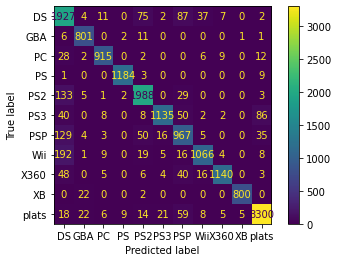

In [101]:
classify_dataset('Platform')

##### PERFORMING CLUSTERING USING RELEVANT CATEGORICAL VARIABLES

In [167]:
from sklearn.cluster import KMeans

# Evaluate the clusters using Silhouette score
# intrinsic metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
## extrinsic metrics
from sklearn.metrics import adjusted_rand_score, v_measure_score, adjusted_mutual_info_score

#### USING RATING AS THE CATEGORICAL VARIABLE FOR CLUSTERING

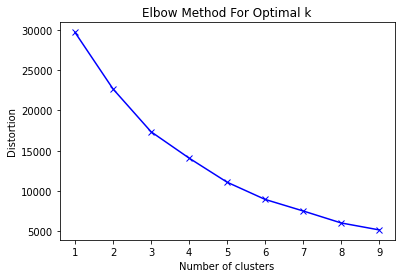

<Figure size 432x288 with 0 Axes>

In [188]:
# Select the relevant features for clustering
X = new_game_data[['Rating', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Convert the categorical feature to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Rating'])


# Get the true class labels
y_true = new_game_data['Rating']

#Using elbow method to get the number of clusters to use
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Check the length of K and distortions lists
assert len(K) == len(distortions)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()


#Save the plot as png image file
plt.savefig('Rating_Elbow.png')

#### Evaluate and Print The Evaluation Metrics

In [185]:

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Fit the k-means algorithm using a cluster of 3
kmeans = KMeans(n_clusters=3, random_state=42)
C_labels = kmeans.fit_predict(X_scaled)


# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')

# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')

# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(X_scaled, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')

# Calculate the Silhouette coefficient
s_score = silhouette_score(X_scaled, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(X_scaled, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')



External Evaluation Measures
********************************
V-measure Score: 0.830
Rand Index Score: 0.767
Mutual Information Score: 0.830

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.214
Silhouette Coefficient: 0.496
Calinski Harabasz Score: 2251.438


##### USING GENRE AS THE CATEGORICAL VARIABLE FOR CLUSTERING

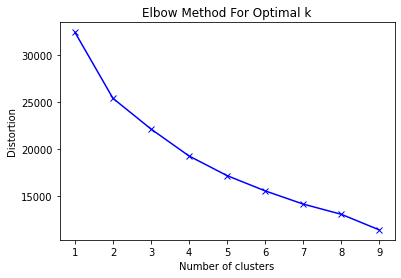

<Figure size 432x288 with 0 Axes>

In [191]:
# Select the relevant features for clustering
X = new_game_data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Convert the categorical feature to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Genre'])


# Get the true class labels
y_true = new_game_data['Genre']

#Using elbow method to get the number of clusters to use
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Check the length of K and distortions lists
assert len(K) == len(distortions)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

#Save the plot as png image file
plt.savefig('Genre_Elbow.png')

#### Evaluate and Print The Evaluation Metrics

In [192]:
# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the k-means algorithm
kmeans = KMeans(n_clusters=4, random_state=42)
C_labels = kmeans.fit_predict(X_scaled)


# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')

# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')

# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(X_scaled, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')

# Calculate the Silhouette coefficient
s_score = silhouette_score(X_scaled, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(X_scaled, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')


External Evaluation Measures
********************************
V-measure Score: 0.436
Rand Index Score: 0.130
Mutual Information Score: 0.436

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.188
Silhouette Coefficient: 0.182
Calinski Harabasz Score: 1498.512


##### USING PLATFORM AS THE CATEGORICAL VARIABLE FOR CLUSTERING

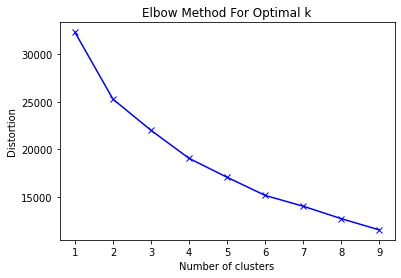

<Figure size 432x288 with 0 Axes>

In [190]:
# Select the relevant features for clustering
X = new_game_data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Convert the categorical feature to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Platform'])


# Get the true class labels
y_true = new_game_data['Platform']

#using elbow method
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Check the length of K and distortions lists
assert len(K) == len(distortions)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

#Save the plot as png image file
plt.savefig('Platform_Elbow.png')

In [193]:
# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Fit the k-means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
C_labels = kmeans.fit_predict(X_scaled)


# Calculate the v-measure score
v_measure = v_measure_score(y_true, C_labels)
print(f'External Evaluation Measures')
print(f'********************************')
print(f'V-measure Score: {v_measure:.3f}')
# Calculate the Rand index score
rand_index = adjusted_rand_score(y_true, C_labels)
print(f'Rand Index Score: {rand_index:.3f}')
# Calculate the mutual information score
mi_score = adjusted_mutual_info_score(y_true, C_labels)
print(f'Mutual Information Score: {mi_score:.3f}\n')

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(X_scaled, C_labels)
print(f'Internal Evaluation Measures')
print(f'********************************')
print(f'Davies-Bouldin Index: {db_score:.3f}')
# Calculate the Silhouette coefficient

s_score = silhouette_score(X_scaled, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')
c_score = calinski_harabasz_score(X_scaled, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')


External Evaluation Measures
********************************
V-measure Score: 0.206
Rand Index Score: 0.040
Mutual Information Score: 0.206

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.996
Silhouette Coefficient: 0.157
Calinski Harabasz Score: 1407.687
